In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [66]:
def manhattan(chrom_num, pop):
    # Read the GWAS summary statistics file

    file_path = f'../data/assoc/{chrom_num}.{pop}.assoc.dat'

    df = pd.read_csv(file_path, sep="\t")

    df = df.drop(columns=['PANEL', 'FILE'])

    df = df.set_index('ID')

    # Select relevant columns
    df = df[['CHR', 'P0', 'TWAS.P']].dropna()  # Drop missing values

    # Strip whitespace and convert to numeric, forcing errors to NaN
    df['TWAS.P'] = pd.to_numeric(df['TWAS.P'].str.strip(), errors='coerce')

    # Drop NaN values
    df = df.dropna()

    # Convert P-values to -log10(P) for plotting
    # df['-log10(P)'] = -np.log10(df['TWAS.P'])
    df['TWAS.P'] = df['TWAS.P'].astype(float)
    df['-log10(P)'] = df['TWAS.P'].apply(lambda x: -np.log10(x))    

    # Convert chromosome numbers to integers for sorting
    df['CHR'] = df['CHR'].astype(int)

    # Sort by chromosome and position
    df = df.sort_values(by=['CHR'])


    # Generate a Manhattan plot

    # Set up the plot
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red']  # Alternating colors for chromosomes

    # Plot each chromosome separately
    for i, chrom in enumerate(df['CHR'].unique()):
        chr_data = df[df['CHR'] == chrom]
        plt.scatter(chr_data['P0'], chr_data['-log10(P)'], 
                    color=colors[i % 2], label=f'Chromosome {chrom}', s=5)

    # Add significance threshold line (suggested genome-wide threshold: 5e-8)
    plt.axhline(y=-np.log10(5e-8), color='black', linestyle='dashed', linewidth=1)

    # Labels and title
    plt.xlabel("x")
    plt.ylabel("-log10(P-value)")
    plt.title(f"Manhattan Plot of GWAS Data (Population: {pop}, Chromosome: {chrom_num})")
    plt.legend(loc="upper right", markerscale=3, fontsize=8)

    # Show the plot
    plt.show()

    # os.makedirs(f'../plots/manhattan/{pop}', exist_ok=True)
    # plt.savefig(f'../plots/manhattan/{pop}/chr{chrom_num}.png')





In [67]:
def miami(chrom_num, pop):
    # Read the GWAS summary statistics file

    file_path = f'../data/assoc/{chrom_num}.{pop}.assoc.dat'

    df2 = pd.read_csv(f'../data/assoc/{chrom_num}.eur.assoc.dat', sep="\t")

    df1 = pd.read_csv(file_path, sep="\t")

    df1 = df.drop(columns=['PANEL', 'FILE'])

    df1 = df.set_index('ID')


    # Select relevant columns
    df1 = df1[['CHR', 'P0', 'TWAS.P']].dropna()  # Drop missing values

    # Strip whitespace and convert to numeric, forcing errors to NaN
    df['TWAS.P'] = pd.to_numeric(df['TWAS.P'].str.strip(), errors='coerce')

    # Drop NaN values
    df = df.dropna()

    # Convert P-values to -log10(P) for plotting
    # df['-log10(P)'] = -np.log10(df['TWAS.P'])
    df['TWAS.P'] = df['TWAS.P'].astype(float)
    df['-log10(P)'] = df['TWAS.P'].apply(lambda x: -np.log10(x))    

    # Convert chromosome numbers to integers for sorting
    df['CHR'] = df['CHR'].astype(int)

    # Sort by chromosome and position
    df = df.sort_values(by=['CHR'])


    # Generate a Manhattan plot

    # Set up the plot
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red']  # Alternating colors for chromosomes

    # Plot each chromosome separately
    for i, chrom in enumerate(df['CHR'].unique()):
        chr_data = df[df['CHR'] == chrom]
        plt.scatter(chr_data['P0'], chr_data['-log10(P)'], 
                    color=colors[i % 2], label=f'Chromosome {chrom}', s=5)

    # Add significance threshold line (suggested genome-wide threshold: 5e-8)
    plt.axhline(y=-np.log10(5e-8), color='black', linestyle='dashed', linewidth=1)

    # Labels and title
    plt.xlabel("x")
    plt.ylabel("-log10(P-value)")
    plt.title(f"Manhattan Plot of GWAS Data (Population: {pop}, Chromosome: {chrom_num})")
    plt.legend(loc="upper right", markerscale=3, fontsize=8)

    # Show the plot
    plt.show()

    # os.makedirs(f'../plots/manhattan/{pop}', exist_ok=True)
    # plt.savefig(f'../plots/manhattan/{pop}/chr{chrom_num}.png')





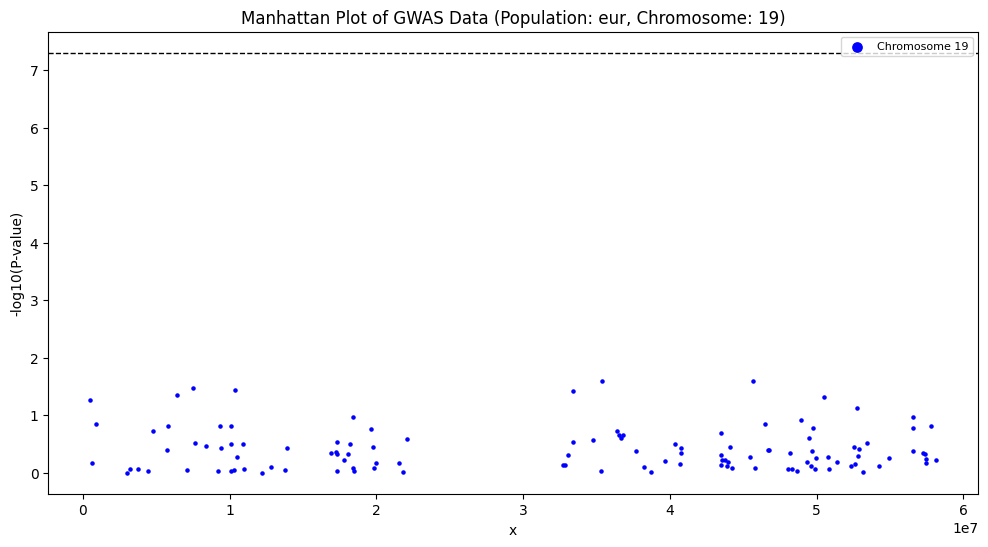

In [71]:
manhattan(19, 'eur')
